In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

## Data Ingestion 

In [135]:
df=pd.read_csv('adult_data.csv',header=None)

In [136]:
df

0                  1       2            3   4                    5   \
0      39          State-gov   77516    Bachelors  13        Never-married   
1      50   Self-emp-not-inc   83311    Bachelors  13   Married-civ-spouse   
2      38            Private  215646      HS-grad   9             Divorced   
3      53            Private  234721         11th   7   Married-civ-spouse   
4      28            Private  338409    Bachelors  13   Married-civ-spouse   
...    ..                ...     ...          ...  ..                  ...   
32556  27            Private  257302   Assoc-acdm  12   Married-civ-spouse   
32557  40            Private  154374      HS-grad   9   Married-civ-spouse   
32558  58            Private  151910      HS-grad   9              Widowed   
32559  22            Private  201490      HS-grad   9        Never-married   
32560  52       Self-emp-inc  287927      HS-grad   9   Married-civ-spouse   

                       6               7       8        9      10  11  12  \
0            Adm-clerical   Not-in-family   White     Male   2174   0  40   
1         Exec-managerial         Husband   White     Male      0   0  13   
2       Handlers-cleaners   Not-in-family   White     Male      0   0  40   
3       Handlers-cleaners         Husband   Black     Male      0   0  40   
4          Prof-specialty            Wife   Black   Female      0   0  40   
...                   ...             ...     ...      ...    ...  ..  ..   
32556        Tech-support            Wife   White   Female      0   0  38   
32557   Machine-op-inspct         Husband   White     Male      0   0  40   
32558        Adm-clerical       Unmarried   White   Female      0   0  40   
32559        Adm-clerical       Own-child   White     Male      0   0  20   
32560     Exec-managerial            Wife   White   Female  15024   0  40   

                   13      14  
0       United-States   <=50K  
1       United-States   <=50K  
2       United-States   <=50K  
3       United-States   <=50K  
4                Cuba   <=50K  
...               ...     ...  
32556   United-States   <=50K  
32557   United-States    >50K  
32558   United-States   <=50K  
32559   United-States   <=50K  
32560   United-States    >50K  

[32561 rows x 15 columns]

In [137]:
df.columns=['Age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain','capital-loss', 'hours-per-week','native-country','income']

In [138]:
df

Age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

### Insertion in Mongodb 

In [213]:
import pymongo
client = pymongo.MongoClient("mongodb://localhost:27017/")
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [214]:
DEFAULT_CONNECTION_URL = "mongodb://localhost:27017/"
DB_NAME = "census_data"

# Establish a connection with mongoDB
client = pymongo.MongoClient(DEFAULT_CONNECTION_URL)

# Create a DB
dataBase = client[DB_NAME]

In [215]:
db_1 = client["census_info"]
COLLECTION_NAME = "census_data"
census = dataBase[COLLECTION_NAME]
db_1.census.insert_many(df.to_dict('records'))

### Reading from Mongodb 

In [216]:
df = pd.DataFrame(list(db_1.census.find()))

In [217]:
df

_id  Age  workclass  fnlwgt  education-num  \
0      636e34a6dd59812b5ecacbc3   39          6   77516             13   
1      636e34a6dd59812b5ecacbc4   50          5   83311             13   
2      636e34a6dd59812b5ecacbc5   38          3  215646              9   
3      636e34a6dd59812b5ecacbc6   53          3  234721              7   
4      636e34a6dd59812b5ecacbc7   28          3  338409             13   
...                         ...  ...        ...     ...            ...   
32556  636e34a7dd59812b5ecb4aef   27          3  257302             12   
32557  636e34a7dd59812b5ecb4af0   40          3  154374              9   
32558  636e34a7dd59812b5ecb4af1   58          3  151910              9   
32559  636e34a7dd59812b5ecb4af2   22          3  201490              9   
32560  636e34a7dd59812b5ecb4af3   52          4  287927              9   

       marital-status  occupation  relationship  race  sex  capital-gain  \
0                   4           0             1     4    1          2174   
1                   2           3             0     4    1             0   
2                   0           5             1     4    1             0   
3                   2           5             0     2    1             0   
4                   2           9             5     2    0             0   
...               ...         ...           ...   ...  ...           ...   
32556               2          12             5     4    0             0   
32557               2           6             0     4    1             0   
32558               6           0             4     4    0             0   
32559               4           0             3     4    1             0   
32560               2           3             5     4    0         15024   

       capital-loss  hours-per-week  native-country  income  
0                 0              40              38       0  
1                 0              13              38       0  
2                 0              40              38       0  
3                 0              40              38       0  
4                 0              40               4       0  
...             ...             ...             ...     ...  
32556             0              38              38       0  
32557             0              40              38       1  
32558             0              40              38       0  
32559             0              20              38       0  
32560             0              40              38       1  

[32561 rows x 15 columns]

In [218]:
df.drop(columns=['_id'],inplace=True)

In [219]:
df

Age  workclass  fnlwgt  education-num  marital-status  occupation  \
0       39          6   77516             13               4           0   
1       50          5   83311             13               2           3   
2       38          3  215646              9               0           5   
3       53          3  234721              7               2           5   
4       28          3  338409             13               2           9   
...    ...        ...     ...            ...             ...         ...   
32556   27          3  257302             12               2          12   
32557   40          3  154374              9               2           6   
32558   58          3  151910              9               6           0   
32559   22          3  201490              9               4           0   
32560   52          4  287927              9               2           3   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0                 1     4    1          2174             0              40   
1                 0     4    1             0             0              13   
2                 1     4    1             0             0              40   
3                 0     2    1             0             0              40   
4                 5     2    0             0             0              40   
...             ...   ...  ...           ...           ...             ...   
32556             5     4    0             0             0              38   
32557             0     4    1             0             0              40   
32558             4     4    0             0             0              40   
32559             3     4    1             0             0              20   
32560             5     4    0         15024             0              40   

       native-country  income  
0                  38       0  
1                  38       0  
2                  38       0  
3                  38       0  
4                   4       0  
...               ...     ...  
32556              38       0  
32557              38       1  
32558              38       0  
32559              38       0  
32560              38       1  

[32561 rows x 14 columns]

In [139]:
df.isin([' ?']).sum()

Age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [140]:
df=df.replace(' ?',np.nan)

In [141]:
df.isnull().sum()

Age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [142]:
columns_with_nan=['workclass', 'occupation', 'native-country']

In [143]:
for i in columns_with_nan:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [144]:
df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [145]:
df.describe().T

count           mean            std      min       25%  \
Age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education-num   32561.0      10.080679       2.572720      1.0       9.0   
capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss    32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
Age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education-num       10.0      12.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0

## EDA 

In [13]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [146]:
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O']
num_col=[fea for fea in df.columns if df[fea].dtype != 'O']

In [147]:
cat_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [148]:
df.nunique()

Age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
income                2
dtype: int64

<AxesSubplot:>

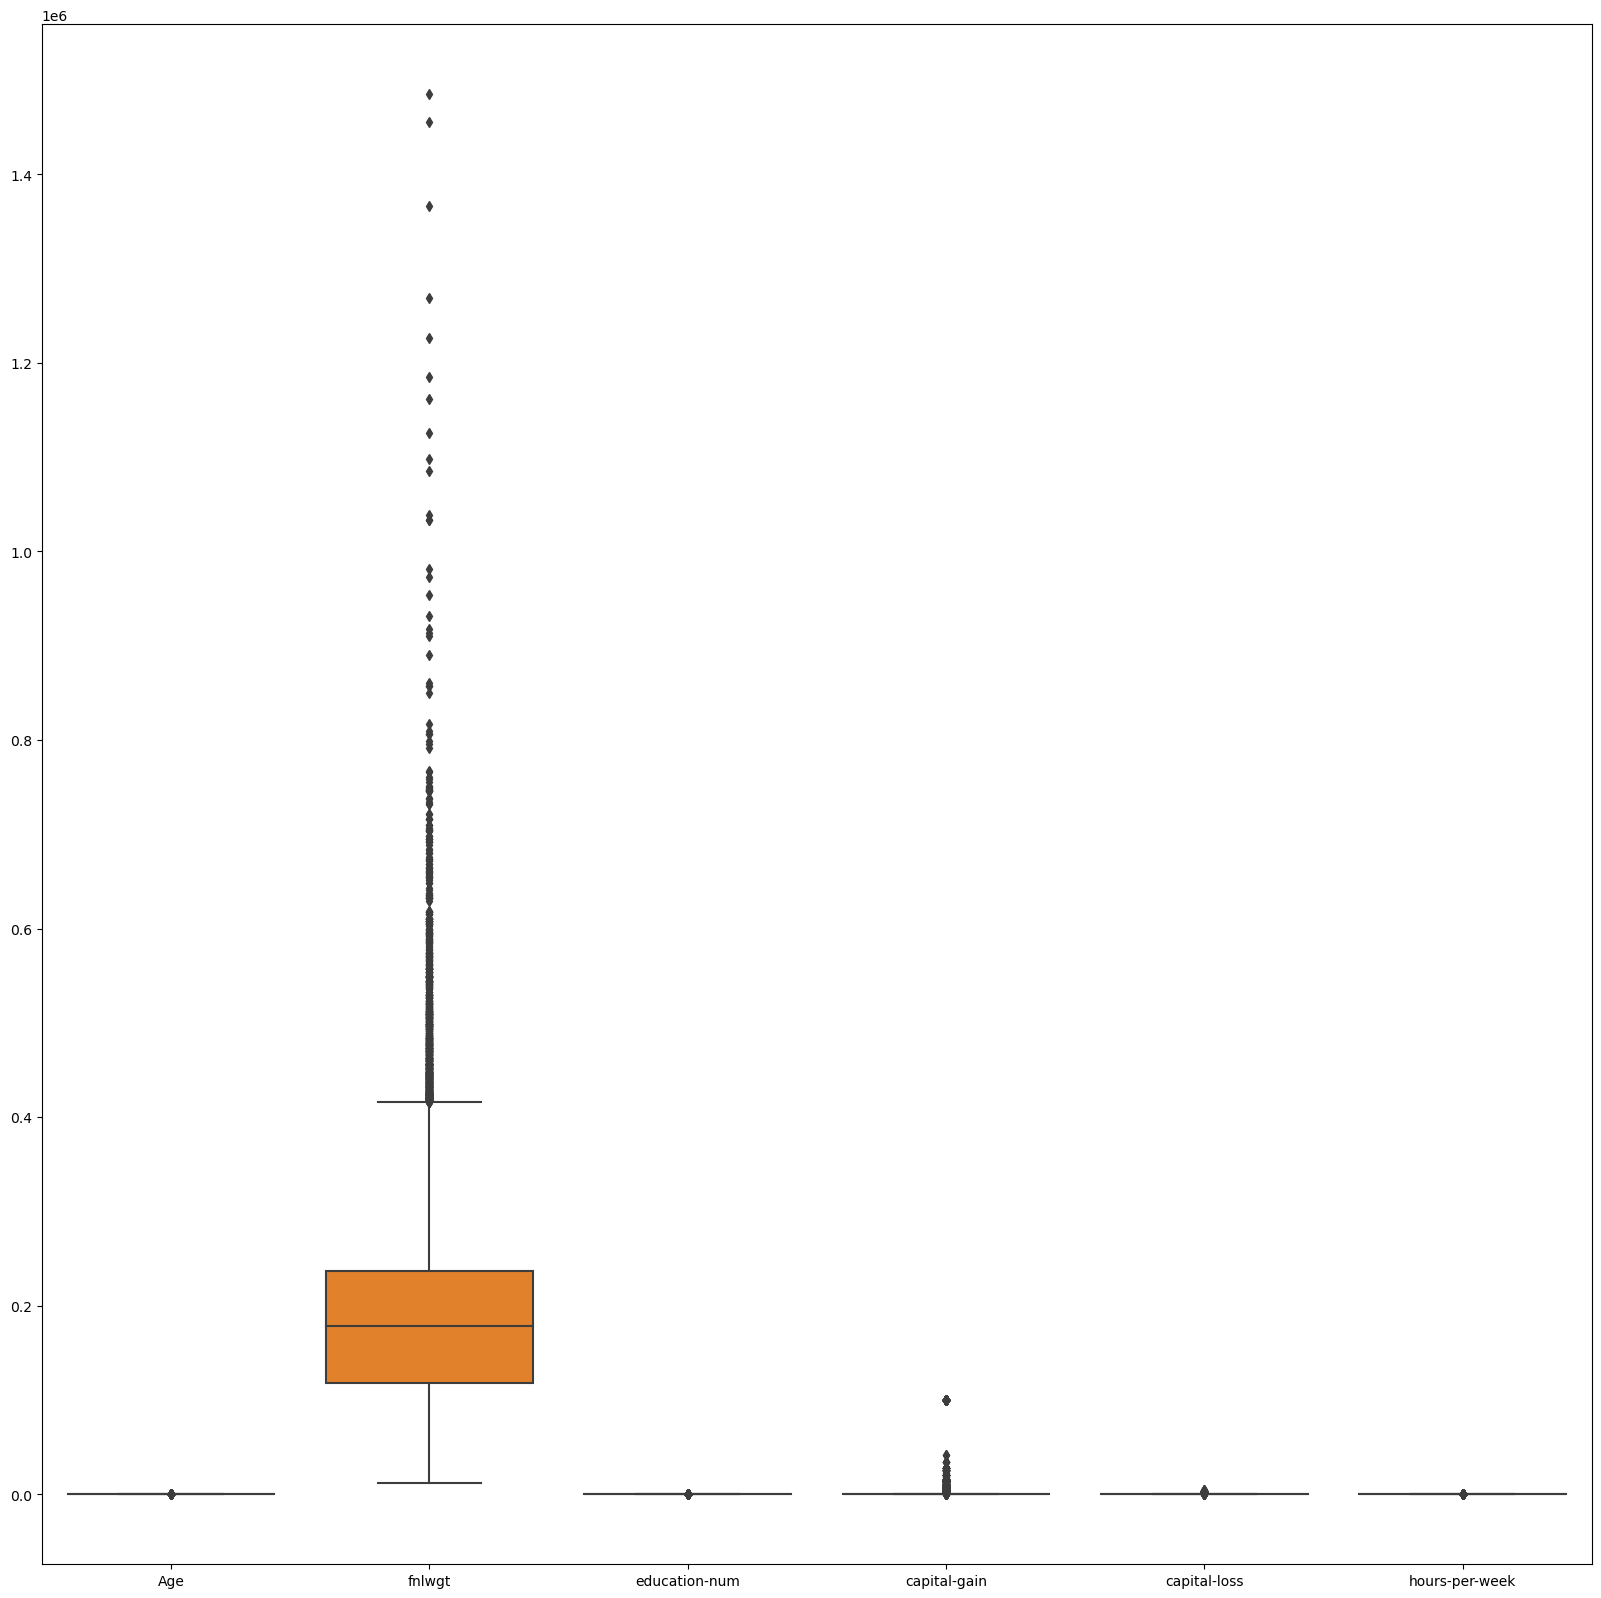

In [149]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

In [150]:
df.drop(columns=['education'],inplace=True)

In [151]:
df

Age          workclass  fnlwgt  education-num       marital-status  \
0       39          State-gov   77516             13        Never-married   
1       50   Self-emp-not-inc   83311             13   Married-civ-spouse   
2       38            Private  215646              9             Divorced   
3       53            Private  234721              7   Married-civ-spouse   
4       28            Private  338409             13   Married-civ-spouse   
...    ...                ...     ...            ...                  ...   
32556   27            Private  257302             12   Married-civ-spouse   
32557   40            Private  154374              9   Married-civ-spouse   
32558   58            Private  151910              9              Widowed   
32559   22            Private  201490              9        Never-married   
32560   52       Self-emp-inc  287927              9   Married-civ-spouse   

               occupation    relationship    race      sex  capital-gain  \
0            Adm-clerical   Not-in-family   White     Male          2174   
1         Exec-managerial         Husband   White     Male             0   
2       Handlers-cleaners   Not-in-family   White     Male             0   
3       Handlers-cleaners         Husband   Black     Male             0   
4          Prof-specialty            Wife   Black   Female             0   
...                   ...             ...     ...      ...           ...   
32556        Tech-support            Wife   White   Female             0   
32557   Machine-op-inspct         Husband   White     Male             0   
32558        Adm-clerical       Unmarried   White   Female             0   
32559        Adm-clerical       Own-child   White     Male             0   
32560     Exec-managerial            Wife   White   Female         15024   

       capital-loss  hours-per-week  native-country  income  
0                 0              40   United-States   <=50K  
1                 0              13   United-States   <=50K  
2                 0              40   United-States   <=50K  
3                 0              40   United-States   <=50K  
4                 0              40            Cuba   <=50K  
...             ...             ...             ...     ...  
32556             0              38   United-States   <=50K  
32557             0              40   United-States    >50K  
32558             0              40   United-States   <=50K  
32559             0              20   United-States   <=50K  
32560             0              40   United-States    >50K  

[32561 rows x 14 columns]

<AxesSubplot:xlabel='marital-status'>

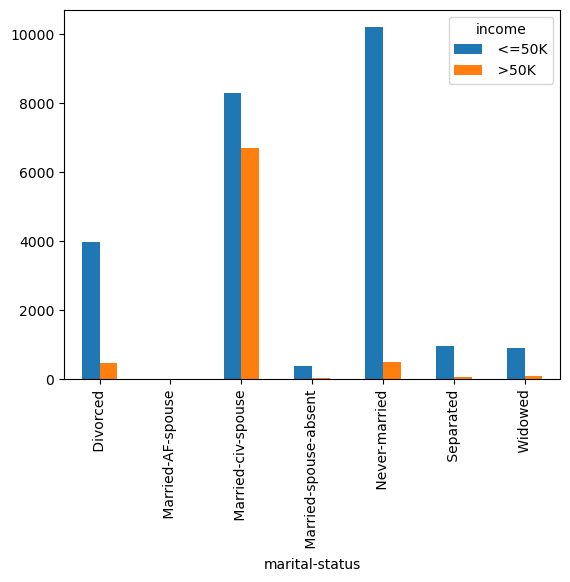

In [152]:
pd.crosstab(df['marital-status'],df.income).plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

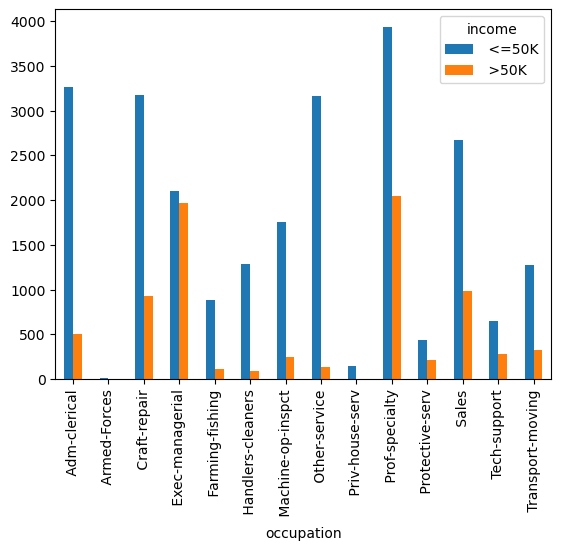

In [47]:
pd.crosstab(df['occupation'],df.income).plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

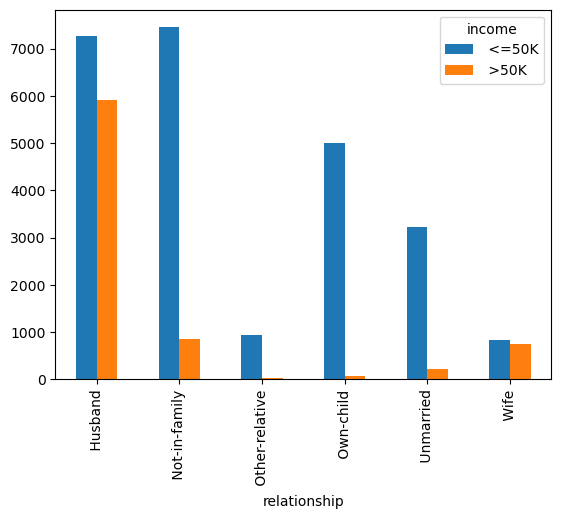

In [48]:
pd.crosstab(df['relationship'],df.income).plot(kind='bar')

### Label Encoding

In [153]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'O':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [154]:
df

Age  workclass  fnlwgt  education-num  marital-status  occupation  \
0       39          6   77516             13               4           0   
1       50          5   83311             13               2           3   
2       38          3  215646              9               0           5   
3       53          3  234721              7               2           5   
4       28          3  338409             13               2           9   
...    ...        ...     ...            ...             ...         ...   
32556   27          3  257302             12               2          12   
32557   40          3  154374              9               2           6   
32558   58          3  151910              9               6           0   
32559   22          3  201490              9               4           0   
32560   52          4  287927              9               2           3   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0                 1     4    1          2174             0              40   
1                 0     4    1             0             0              13   
2                 1     4    1             0             0              40   
3                 0     2    1             0             0              40   
4                 5     2    0             0             0              40   
...             ...   ...  ...           ...           ...             ...   
32556             5     4    0             0             0              38   
32557             0     4    1             0             0              40   
32558             4     4    0             0             0              40   
32559             3     4    1             0             0              20   
32560             5     4    0         15024             0              40   

       native-country  income  
0                  38       0  
1                  38       0  
2                  38       0  
3                  38       0  
4                   4       0  
...               ...     ...  
32556              38       0  
32557              38       1  
32558              38       0  
32559              38       0  
32560              38       1  

[32561 rows x 14 columns]

### Feature Selection

In [155]:
X = df.drop('income', axis=1)
Y = df['income']

In [156]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(X, Y)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.4
1 3.95
2 16.65
3 12.84
4 6.67
5 7.33
6 9.41
7 1.42
8 3.07
9 9.28
10 3.07
11 9.4
12 1.5


In [157]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education-num   32561 non-null  int64
 4   marital-status  32561 non-null  int32
 5   occupation      32561 non-null  int32
 6   relationship    32561 non-null  int32
 7   race            32561 non-null  int32
 8   sex             32561 non-null  int32
 9   capital-gain    32561 non-null  int64
 10  capital-loss    32561 non-null  int64
 11  hours-per-week  32561 non-null  int64
 12  native-country  32561 non-null  int32
dtypes: int32(7), int64(6)
memory usage: 2.4 MB


<AxesSubplot:xlabel='marital-status'>

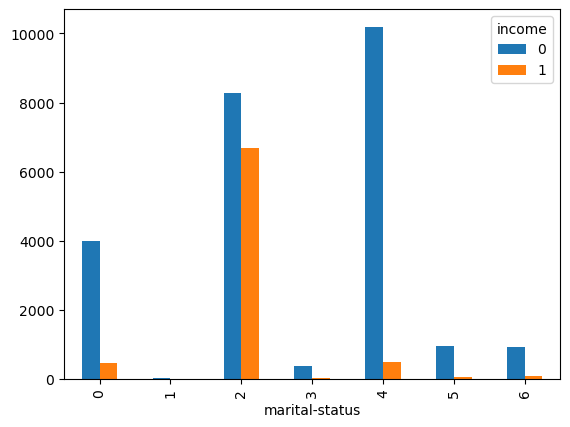

In [55]:
pd.crosstab(df['marital-status'],df.income).plot(kind='bar')


In [158]:
X.drop(columns=['workclass','race','sex','capital-loss','native-country'],inplace=True)

In [159]:
X

Age  fnlwgt  education-num  marital-status  occupation  relationship  \
0       39   77516             13               4           0             1   
1       50   83311             13               2           3             0   
2       38  215646              9               0           5             1   
3       53  234721              7               2           5             0   
4       28  338409             13               2           9             5   
...    ...     ...            ...             ...         ...           ...   
32556   27  257302             12               2          12             5   
32557   40  154374              9               2           6             0   
32558   58  151910              9               6           0             4   
32559   22  201490              9               4           0             3   
32560   52  287927              9               2           3             5   

       capital-gain  hours-per-week  
0              2174              40  
1                 0              13  
2                 0              40  
3                 0              40  
4                 0              40  
...             ...             ...  
32556             0              38  
32557             0              40  
32558             0              40  
32559             0              20  
32560         15024              40  

[32561 rows x 8 columns]

## Standard Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()

In [160]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

<AxesSubplot:>

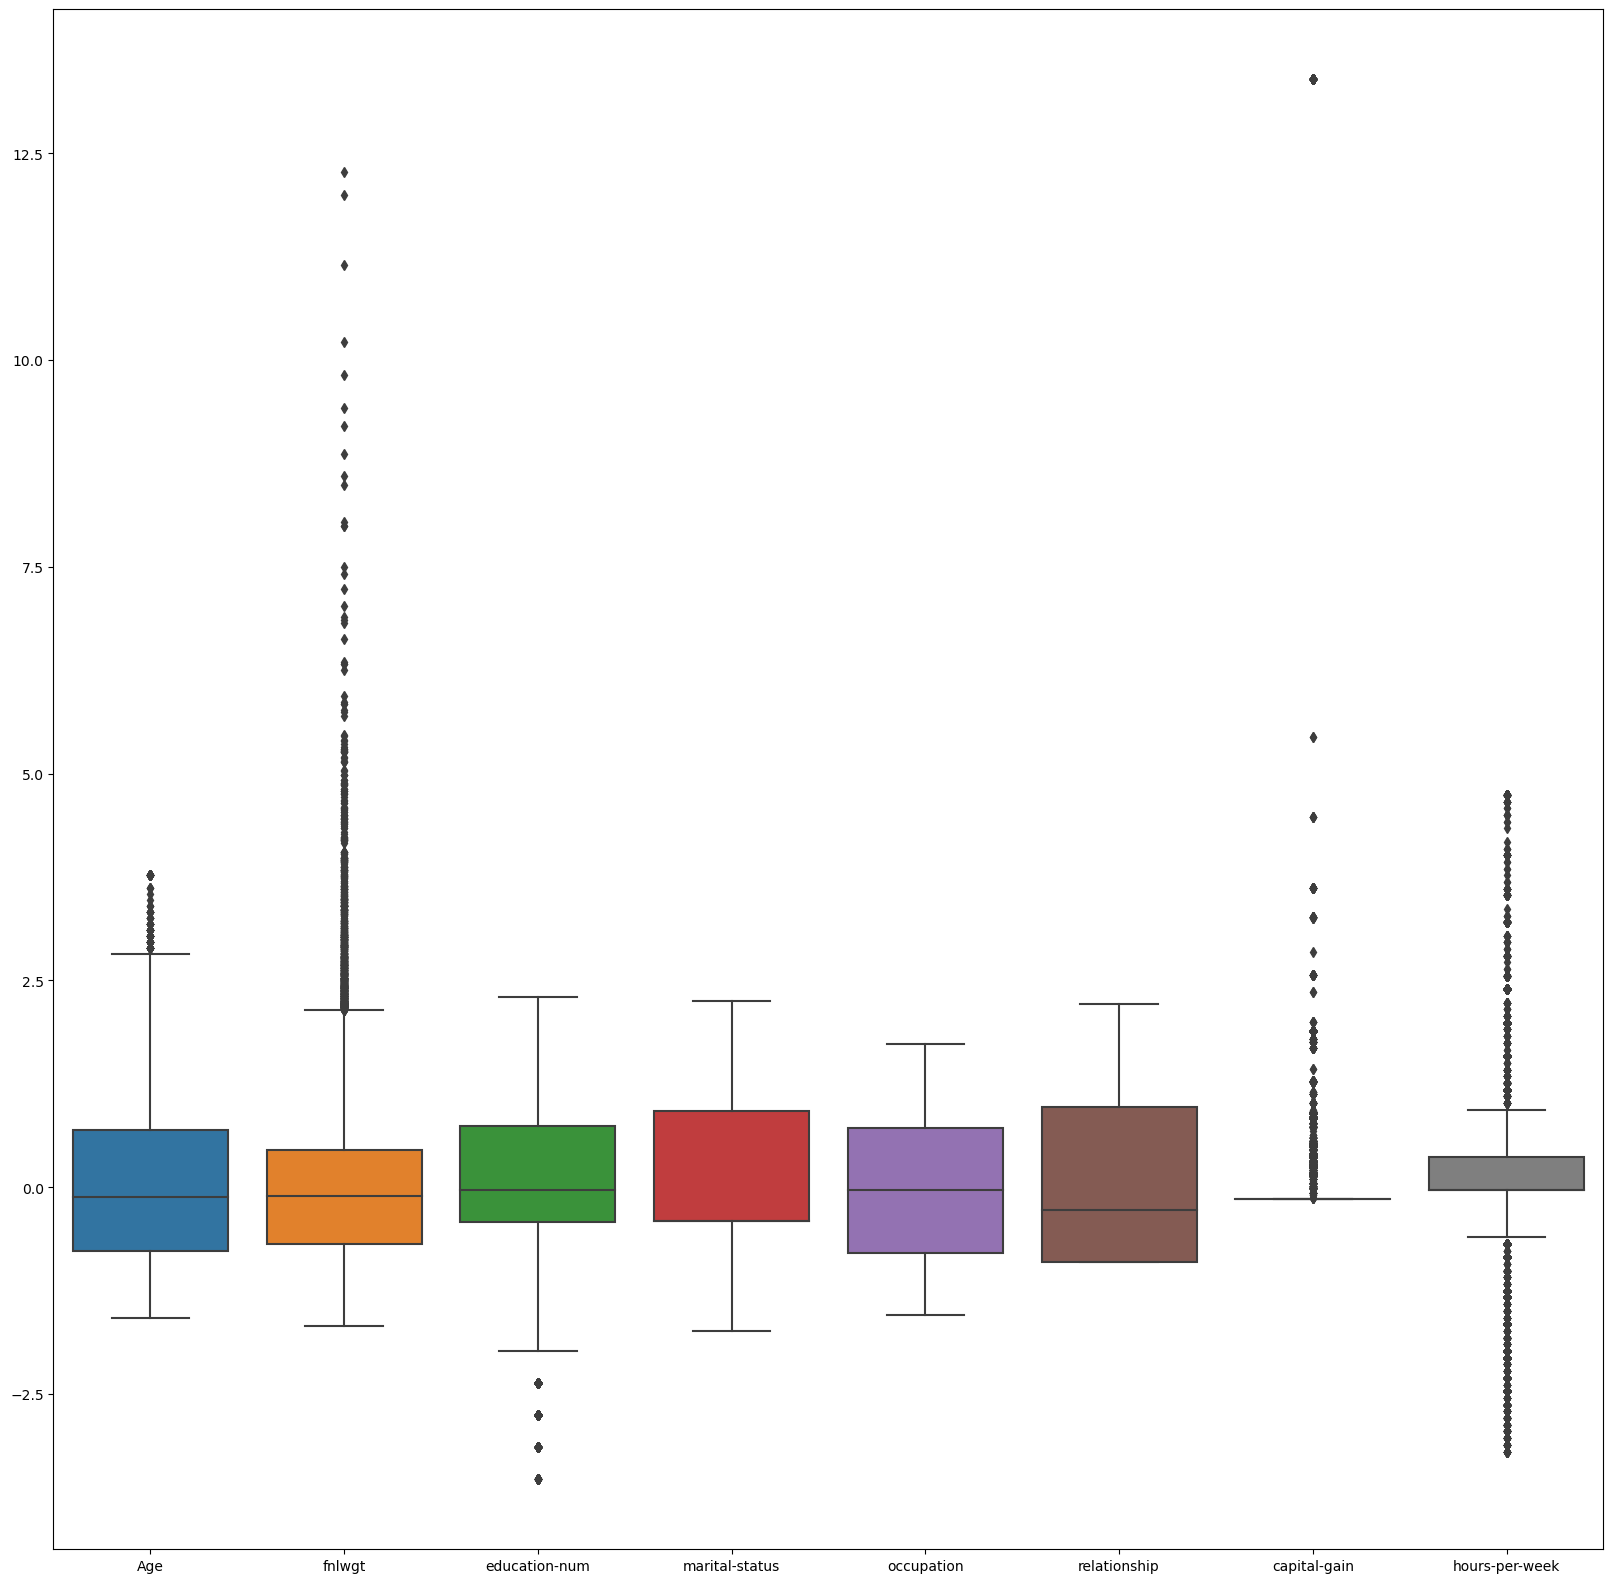

In [161]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = X , ax = ax)

## Handling imbalance 

In [162]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
ros.fit(X, Y)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [163]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             49440 non-null  float64
 1   fnlwgt          49440 non-null  float64
 2   education-num   49440 non-null  float64
 3   marital-status  49440 non-null  float64
 4   occupation      49440 non-null  float64
 5   relationship    49440 non-null  float64
 6   capital-gain    49440 non-null  float64
 7   hours-per-week  49440 non-null  float64
dtypes: float64(8)
memory usage: 3.0 MB


In [164]:
from collections import Counter

In [165]:
print(Counter(Y))

Counter({0: 24720, 1: 7841})


In [166]:
print(Counter(Y_resampled))

Counter({0: 24720, 1: 24720})


## Train,Test, Split 

In [167]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled , Y_resampled , test_size = .2, random_state=42)

In [92]:
#x_train,x_test,y_train,y_test=train_test_split(X_scaled, Y , test_size = .25)

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [169]:
log=LogisticRegression()

In [170]:
log.fit(x_train,y_train)

LogisticRegression()

In [171]:
log.score(x_test,y_test)

0.7602144012944984

In [172]:
svc=SVC()

In [173]:
svc.fit(x_train,y_train)

SVC()

## Model Evaluation 

In [174]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import f1_score

In [175]:
y_pred_log_reg=log.predict(x_test)
score=r2_score(y_test,y_pred_log_reg)

print('Accuracy score:', round(accuracy_score(y_test, y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_log_reg) * 100, 2))

Accuracy score: 76.02
F1 score: 76.25


In [176]:
y_pred_svc=svc.predict(x_test)
score=r2_score(y_test,y_pred_svc)


print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_svc) * 100, 2))

Accuracy score: 81.71
F1 score: 82.9


## Hyperparameter Tuning

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
grid_param={'solver' : ['liblinear'],
           'penalty' : ['l1', 'l2'],
            'C': [0.5,1.0,1.5,2,2.5]
           }

In [179]:
grid_search = GridSearchCV(estimator=log,
                     param_grid=grid_param,
                     cv=5)

In [180]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1.0, 1.5, 2, 2.5], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [181]:
grid_search.best_params_

{'C': 1.5, 'penalty': 'l2', 'solver': 'liblinear'}

In [182]:
log=LogisticRegression(C=1.5, solver='liblinear',penalty='l2')

In [183]:
log.fit(x_train,y_train)

LogisticRegression(C=1.5, solver='liblinear')

In [184]:
y_pred_log_reg=log.predict(x_test)
print('Logistic Regression Score')

print('Accuracy score:', round(accuracy_score(y_test, y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_log_reg) * 100, 2))

Logistic Regression Score
Accuracy score: 76.01
F1 score: 76.24


In [187]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
cm_log_reg=confusion_matrix(y_test,y_pred_log_reg)
cm_svc=confusion_matrix(y_test,y_pred_svc)

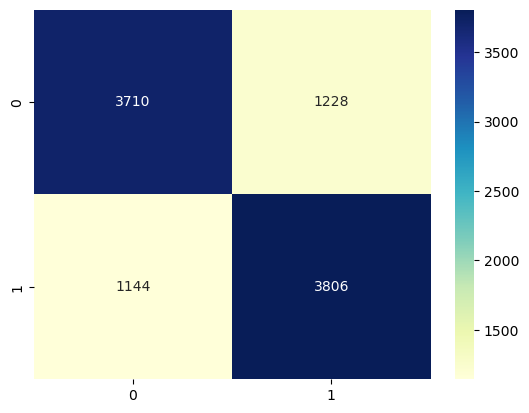

In [188]:
plt.style.use('default')
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

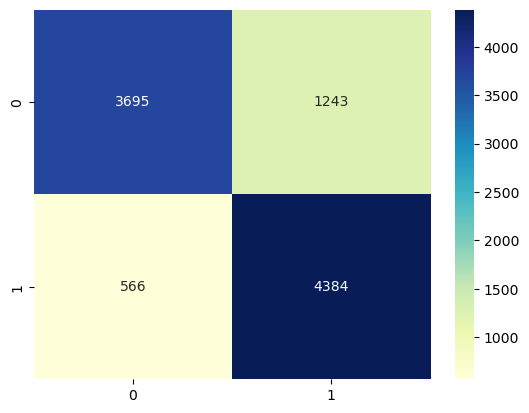

In [189]:
plt.style.use('default')
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [190]:
auc=roc_auc_score(y_test,y_pred_log_reg)

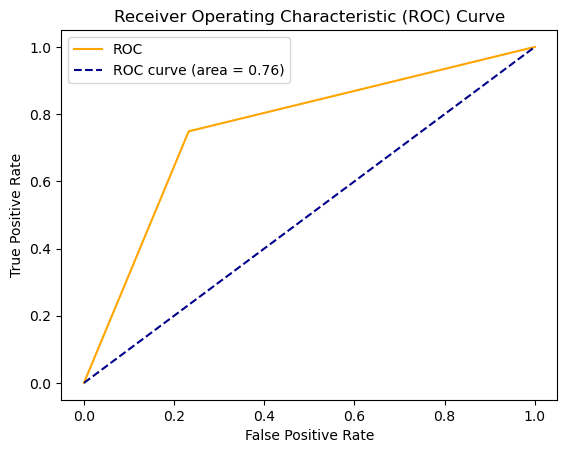

In [97]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_log_reg)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [194]:
auc_svc=roc_auc_score(y_test,y_pred_svc)

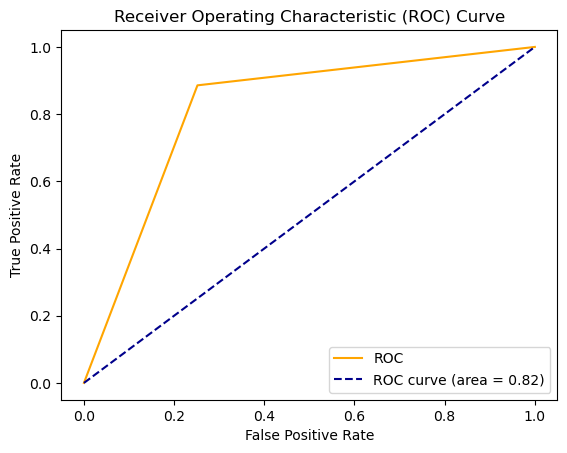

In [195]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_svc)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_svc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Pickling 

In [206]:
import pickle
filename = 'census.pickle'
filehandler = open(filename,"wb")
pickle.dump(svc,filehandler)
file = open(filename,'rb')
object_file = pickle.load(file)

In [211]:
y_pred_svc_pickle=object_file.predict(x_test)

In [209]:
x_test.iloc[0]

Age              -1.362269
fnlwgt            0.098293
education-num    -0.420060
marital-status    0.921634
occupation        0.216794
relationship      0.966947
capital-gain     -0.145920
hours-per-week   -0.197409
Name: 32168, dtype: float64

In [212]:
y_pred_svc_pickle=svc.predict(x_test)
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc_pickle) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_svc_pickle) * 100, 2))

Accuracy score: 81.71
F1 score: 82.9
